# COMP 432 Machine Learning - Term Project Fall 2020

#### Student Names:
#### Firas Sawan       ID#26487815 
#### Giselle Martel    ID#26352936

# FakeNewsClassifiers

##### A comparison between different Machine Learning and Deep Learning models in predicting which news articles are "Fake News" or "Real News"

In [6]:
import tools.tools as tools
import preprocess as preprocess
import model.logistic_regression as LR
import model.decision_tree as DT
import model.random_forest as RF
import model.support_vector_machine as SVC
import model.naive_bayesian_classifier as NB
import model.convolutional_neural_network as CNN

import matplotlib
import matplotlib as plt
import pandas as pd
import numpy as np


# Pre-Processing Data

In [7]:
%time

# change param of use_full_dataset to True to use full data set
# Warning: may take an hour or longer to train all models using full dataset!)
use_full_dataset = False
if(not use_full_dataset) : tools.set_results_dir("./test_results/")
    
X_train, X_test, y_train, y_test = preprocess.preprocess(use_full_dataset)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs

Preprocessing of data...

Parsing news dataset from file: Fake_test.csv
Setting label for news dataset: FAKE

Preview of Fake news Dataset
                                                 title  \
0    FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...   
1    APPLE‚ÄôS CEO SAYS RELIGIOUS FREEDOM LAWS ARE ...   
2    WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...   
3    OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY   
4    BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...   
..                                                 ...   
793  WATCH SWAMP MONSTER James Clapper Make False C...   
794  TRUMP‚ÄôS NATIONAL SECURITY SPEECH Reveals Pol...   
795  UNREAL! DEMOTED DEPUTY AG Bailed On Being Inte...   
796  YOU‚ÄôLL NEVER GUESS Who The New York Times Is...   
797  JUST IN: OBAMA REGIME Demanded Homeland Securi...   

                                                  text   subject       date  \
0    Just making roo

# Logistic Regression Classifier 
## Hyperparameter search + training

In [8]:
%time
# Logisitic Regression Classifier
print("Testing Logistic Regression Classifier ...\n")

# set the hyperparams
C = np.logspace(-4,4,9)
param_grid = {"C":C}

# fetch all the estimators given the chosen hyperparameters
estimators = LR.train_all_estimators(X_train, y_train, C)

# perform hyperparam search
grid_search = LR.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100




CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Testing Logistic Regression Classifier ...

Fitting data to LogisticRegression Classifier, this may take a while...
77.171% training accuracy for C=0.0001
88.809% training accuracy for C=0.0010
94.539% training accuracy for C=0.0100
97.762% training accuracy for C=0.1000
99.463% training accuracy for C=1.0000
100.000% training accuracy for C=10.0000
100.000% training accuracy for C=100.0000
100.000% training accuracy for C=1000.0000
100.000% training accuracy for C=10000.0000
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.8s finished


## Calculate estimator scores and overall overfitting

In [17]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nLogistic Regression overfitting: {:.3f}\n".format(overfitting))

# display details of best estimator
tools.display_best_estimator(score, "LogisticRegression", hyperparams)



Logistic Regression overfitting: 0.485

Best LogisticRegression estimator accuracy: 92.569%
Hyperparams:
C: 0.1



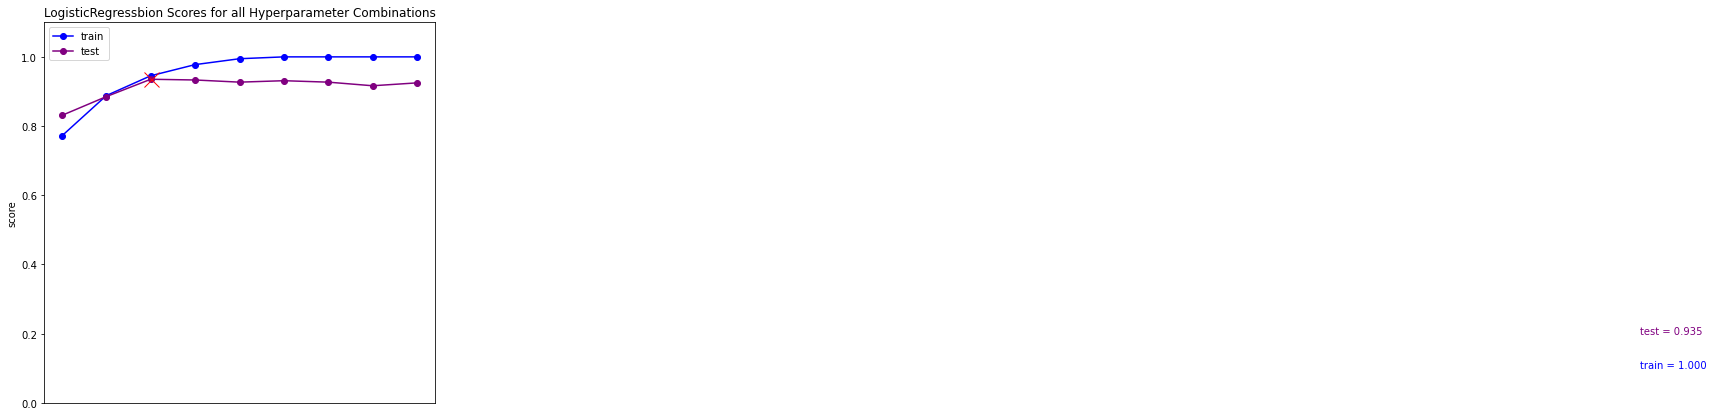

In [18]:
# plot the scores of each estimator (see test_results or results folder for png files of graphs)
tools.plot_estimator_scores("LogisticRegressbion",trn_scores,test_scores)

## Classify Data

Printing metrics...
mean squared error: 6.681%
accuracy: 93.319%
recall: 92.308%
precision: 93.913%
f1: 93.103%
jacccard: 87.097%



<Figure size 432x288 with 0 Axes>

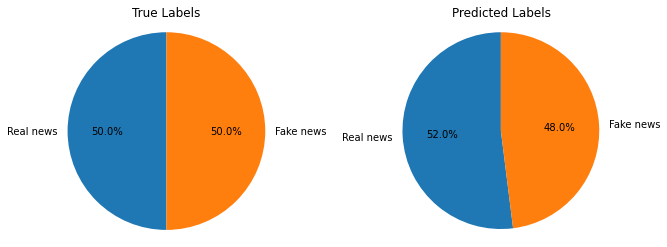

In [19]:
# use best estimator to make predictions
y_pred = LR.logistic_regression_predict(best_estimator, X_test)
tools.display_prediction_scores(y_test,y_pred)

tools.plot_predicted_labels(y_test, y_pred, "LogisticRegression")

## Confusion Matrix

Plotting confusion matrix for LogisticRegression Classifier...


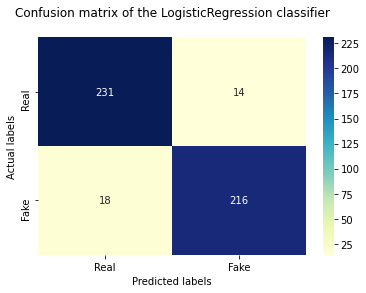

In [20]:

tools.plot_confusion_matrix(y_test,y_pred,"LogisticRegression")






# Decision Tree Classifier
## Hyperparameter search + training

In [21]:
%time
print("Testing Decision Tree Classifier ...\n")

# set the hyperparams
D = np.linspace(2,30,15)
param_grid = {"max_depth":D}

# fetch all the estimators given the chosen hyperparameters
estimators = DT.train_all_estimators(X_train, y_train, D)

# perform hyperparam search
grid_search = DT.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_ * 100

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs
Testing Decision Tree Classifier ...

Fitting data to DecisionTree, this may take a while...
83.975% training accuracy for max_depth=2.000
92.032% training accuracy for max_depth=4.000
95.076% training accuracy for max_depth=6.000
98.120% training accuracy for max_depth=8.000
99.284% training accuracy for max_depth=10.000
99.910% training accuracy for max_depth=12.000
100.000% training accuracy for max_depth=14.000
100.000% training accuracy for max_depth=16.000
100.000% training accuracy for max_depth=18.000
100.000% training accuracy for max_depth=20.000
100.000% training accuracy for max_depth=22.000
100.000% training accuracy for max_depth=24.000
100.000% training accuracy for max_depth=26.000
100.000% training accuracy for max_depth=28.000
100.000% training accuracy for max_depth=30.000
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished


## Plot Features Importances

In [22]:
tools.plot_featubre_importances(X_train, best_estimator, "DecisionTree", savefig=True)


AttributeError: module 'tools.tools' has no attribute 'plot_featubre_importances'

## Calculate estimator scores and overall overfitting

In [ ]:

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nDecision Tree overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("DecisionTree",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "DecisionTree", hyperparams)

## Classify Data

Printing metrics...
mean squared error: 13.779%
accuracy: 86.221%
recall: 88.462%
precision: 84.146%
f1: 86.250%
jacccard: 75.824%

Saving piechart of results for DecisionTree Classifier to file ./test_results/DecisionTree/piechart.png...


<Figure size 432x288 with 0 Axes>

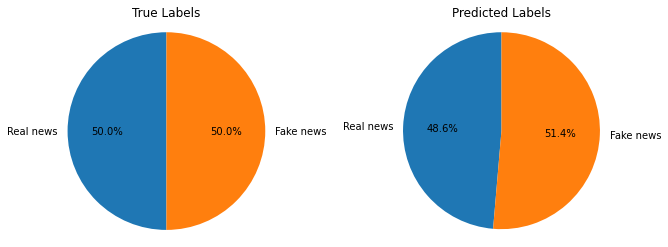

In [23]:
# use best estimator to make predictions
y_pred = DT.decision_tree_predict(best_estimator, X_test)
tools.display_prediction_scores(y_test,y_pred)

tools.plot_predicted_labels(y_test, y_pred, "DecisionTree")

## Confusion Matrix

Plotting confusion matrix for DecisionTree Classifier...
Saving confusion matrix for DecisionTree Classifier to file ./test_results/DecisionTree/confusion_matrix.png...


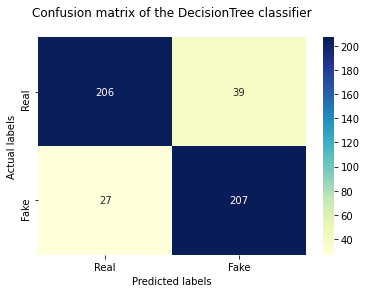

In [24]:
tools.plot_confusion_matrix(y_test,y_pred,"DecisionTree")

# Random Forest Classifier
## Hyperparameter search + training

In [33]:
%time

print("Testing Random Forest Classifier ...\n")

# set the hyperparams
D = np.linspace(2,14,7)
N = np.linspace(2,20,10, dtype="int32")

param_grid = {"max_depth":D, "n_estimators": N}

# fetch all the estimators given the chosen hyperparameters
estimators = RF.train_all_estimators(X_train,y_train,D,N)

# perform hyperparam search
grid_search = RF.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Testing Random Forest Classifier ...

Fitting data to Random Forest Classifier, this may take a while...
75.201% training accuracy for max_depth=2.000 n_estimators=2.000
75.739% training accuracy for max_depth=2.000 n_estimators=4.000
77.440% training accuracy for max_depth=2.000 n_estimators=6.000
78.962% training accuracy for max_depth=2.000 n_estimators=8.000
84.602% training accuracy for max_depth=2.000 n_estimators=10.000
85.855% training accuracy for max_depth=2.000 n_estimators=12.000
84.691% training accuracy for max_depth=2.000 n_estimators=14.000
85.139% training accuracy for max_depth=2.000 n_estimators=16.000
83.259% training accuracy for max_depth=2.000 n_estimators=18.000
82.632% training accuracy for max_depth=2.000 n_estimators=20.000
81.110% training accuracy for max_depth=4.000 n_estimators=2.000
83.975% training accuracy for max_depth=4.000 n_estimators=4.000
83.527% training accuracy for max_depth=4.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   12.6s finished


## Plot Feature Importances

Plotting feature importances for RandomForest Classifier..


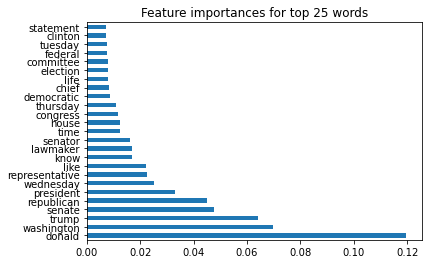

In [34]:
tools.plot_feature_importances(X_train, best_estimator, "RandomForest")

## Calculate Estimator scores and Overall Overfitting


Random Forest overfitting: 4.095

Best RandomForest estimator accuracy: 92.747%
Hyperparams:
max_depth: 8.0
n_estimators: 18



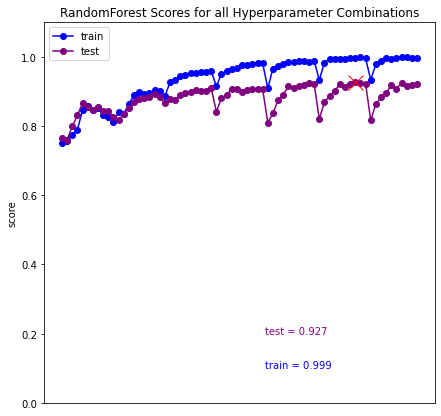

In [35]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nRandom Forest overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("RandomForest",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "RandomForest", hyperparams)

## Classify Data

<Figure size 432x288 with 0 Axes>

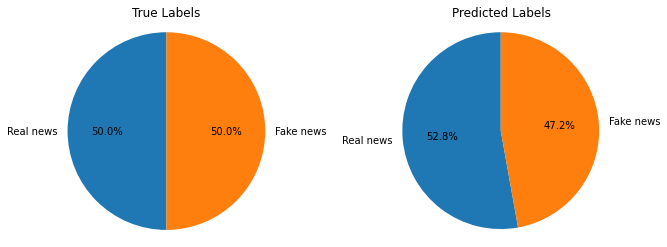

In [36]:
# use best estimator to make predictions
y_pred = RF.random_forest_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "RandomForest")

## Confusion Matrix

Plotting confusion matrix for RandomForest Classifier...


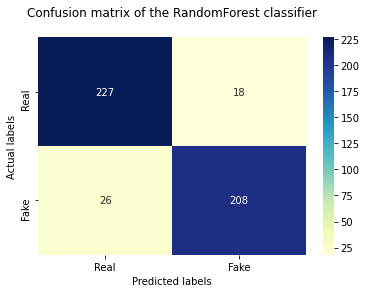

In [37]:
tools.plot_confusion_matrix(y_test,y_pred,"RandomForest")

# Support Vector Machine Classifier
## Hyperparameter search + training

In [38]:
%time
print("Testing SVM Classifier ...\n")

# set the hyperparams
C = np.logspace(-2,3,6)
G = np.logspace(-2,3,6)
K = ["rbf", "linear"]

param_grid = {"C":C, "gamma": G, "kernel": K}

# fetch all the estimators given the chosen hyperparameters
estimators = SVC.train_all_estimators(X_train, y_train, C, G, K)

# perform hyperparam search
grid_search = SVC.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Testing SVM Classifier ...

Fitting data to SVC, this may take a while...
60.967% training accuracy for C=0.010 gamma=0.010 kernel=rbf
72.874% training accuracy for C=0.010 gamma=0.010 kernel=linear
64.190% training accuracy for C=0.010 gamma=0.100 kernel=rbf
72.874% training accuracy for C=0.010 gamma=0.100 kernel=linear
85.407% training accuracy for C=0.010 gamma=1.000 kernel=rbf
72.874% training accuracy for C=0.010 gamma=1.000 kernel=linear
65.980% training accuracy for C=0.010 gamma=10.000 kernel=rbf
72.874% training accuracy for C=0.010 gamma=10.000 kernel=linear
59.445% training accuracy for C=0.010 gamma=100.000 kernel=rbf
72.874% training accuracy for C=0.010 gamma=100.000 kernel=linear
59.445% training accuracy for C=0.010 gamma=1000.000 kernel=rbf
72.874% training accuracy for C=0.010 gamma=1000.000 kernel=linear
64.996% training accuracy for C=0.100 gamma=0.010 kernel=rbf
87.645% training accuracy for C=0.100 g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   17.7s finished


## Calculate Estimator scores and Overall Overfitting


SVC overfitting: 3.307

Best SVC estimator accuracy: 90.957%
Hyperparams:
C: 1.0
gamma: 0.01
kernel: rbf



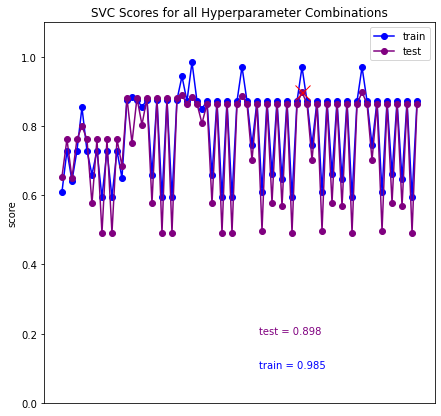

In [39]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nSVC overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("SVC",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "SVC", hyperparams)


## Classify Data

Printing metrics...
mean squared error: 11.065%
accuracy: 88.935%
recall: 96.154%
precision: 83.643%
f1: 89.463%
jacccard: 80.935%



<Figure size 432x288 with 0 Axes>

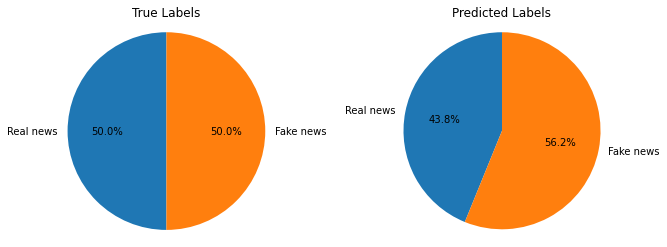

In [41]:
# use best estimator to make predictions
y_pred = SVC.support_vector_machine_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "SVC")
tools.display_prediction_scores(y_test,y_pred)

## Confusion Matrix

Plotting confusion matrix for SVC Classifier...


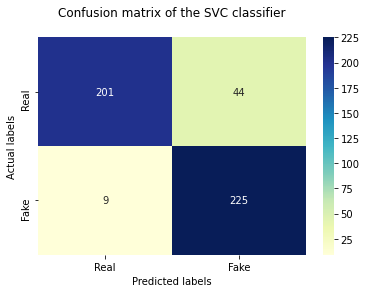

In [42]:
tools.plot_confusion_matrix(y_test,y_pred,"SVC")

# Naive Bayes Classifier
## Hyperparameter search + training

In [44]:
print("Testing Naive Bayesian Classifier ...\n")

# set the hyperparams
A = np.logspace(-4,4,9)
F = [True, False]
param_grid = {"alpha":A, "fit_prior":F}

# fetch all the estimators given the chosen hyperparameters
estimators = NB.train_all_estimators(X_train, y_train, A , F)

# perform hyperparam search
grid_search = NB.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100


Testing Naive Bayesian Classifier ...

Fitting data to NaiveBayes Classifier, this may take a while...
91.137% training accuracy for alpha=0.0001 fit_prior=True
91.137% training accuracy for alpha=0.0010 fit_prior=True
91.137% training accuracy for alpha=0.0100 fit_prior=True
91.137% training accuracy for alpha=0.1000 fit_prior=True
90.958% training accuracy for alpha=1.0000 fit_prior=True
90.958% training accuracy for alpha=10.0000 fit_prior=True
90.242% training accuracy for alpha=100.0000 fit_prior=True
87.108% training accuracy for alpha=1000.0000 fit_prior=True
86.213% training accuracy for alpha=10000.0000 fit_prior=True
89.436% training accuracy for alpha=0.0001 fit_prior=False
89.436% training accuracy for alpha=0.0010 fit_prior=False
89.436% training accuracy for alpha=0.0100 fit_prior=False
89.436% training accuracy for alpha=0.1000 fit_prior=False
89.436% training accuracy for alpha=1.0000 fit_prior=False
89.436% training accuracy for alpha=10.0000 fit_prior=False
88.451% tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.7s finished


## Calculate Estimator scores and Overall Overfitting


Naive Bayes overfitting: 0.174

Best NaiveBayes estimator accuracy: 90.150%
Hyperparams:
alpha: 1.0
fit_prior: True



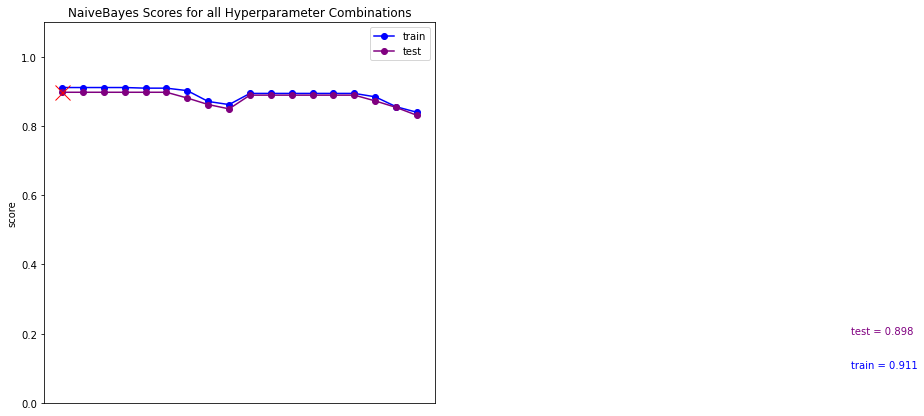

In [45]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nNaive Bayes overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("NaiveBayes",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "NaiveBayes", hyperparams)

## Classify Data

Saving piechart of results for NaiveBayes Classifier to file ./test_results/NaiveBayes/piechart.png...
Printing metrics...
mean squared error: 10.230%
accuracy: 89.770%
recall: 87.179%
precision: 91.480%
f1: 89.278%
jacccard: 80.632%



<Figure size 432x288 with 0 Axes>

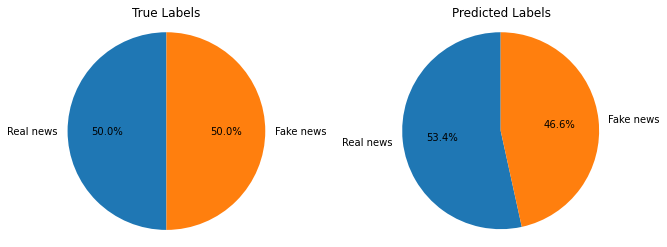

In [46]:
# use best estimator to make predictions
y_pred = NB.naive_bayesian_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "NaiveBayes", True)
tools.display_prediction_scores(y_test,y_pred)



## Confusion Matrix

Plotting confusion matrix for NaiveBayes Classifier...
Saving confusion matrix for NaiveBayes Classifier to file ./test_results/NaiveBayes/confusion_matrix.png...


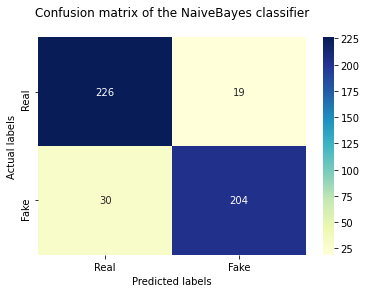

In [47]:
tools.plot_confusion_matrix(y_test,y_pred,"NaiveBayes", True)

tools.display_result(best_estimator, X_train)

# Deep Learning - Convolutional Neural Network Classifier

### Now we compare deep learning classification to our traditional Machine Learning models...

## Set model and training parameters

In [49]:
# params for CNN model
model_params = {
    # text preprocessing
    "seq_len": 216,
    "num_words": 10000,
    "embedding_size": 64,

    # size of convolution outputs
    "conv_out_size": 32,

    # Number of strides for each convolution
    "stride": 2,

    # kernel sizes
    "kernel_sizes": [2,3,4,5]
}

# training parameters
epochs = 18
batch_size = 108
learning_rate = 0.001

Testing Convolutional Neural Network Classifier ...



## Construct the CNN model

In [51]:
model = CNN.CnnModel(model_params)

Constructing the Convolutional Neural Network Classifier ...



## Train the CNN

In [53]:
y_pred, train_accuracies, test_accuracies, train_losses, test_losses \
    = CNN.train_cnn(
        model, 
        X_train, 
        X_test, 
        y_train, 
        y_test, 
        epochs, 
        batch_size, 
        learning_rate
    )

RuntimeError: Given groups=1, weight of size [32, 216, 2], expected input[108, 224, 64] to have 216 channels, but got 224 channels instead

## Plot Training + Test Prediction Accuracies for each Epoch

In [ ]:
tools.plot_cnn_accuracies(train_accuracies,test_accuracies, "CNN", epochs, batch_size, learning_rate, True)


## Plot Training + Test Prediction Losses for each Epoch

In [ ]:
tools.plot_cnn_losses(train_losses, test_losses, "CNN", epochs, batch_size, learning_rate, True)